# BoomBikes!

#### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


#### They want to understand the factors on which the demand for these shared bikes depends and factors affecting the demand for these shared bikes in the American market. The company wants to know:

#### 1. Which variables are significant in predicting the demand for shared bikes.
#### 2. How well those variables describe the bike demands

#### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading and Understanding the Data

In [2]:
bike = pd.read_csv('bikesharingDataset.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dataset has daily data of two years containing number of bikes rented each day along with temperature, windspeed, humidity, details about each day if it is a holiday, weekday, working day etc.

#### The dataset has 730 rows and 16 columns. There aren't any null values. Hence we can proceed with further analysis and model building

## Data Preparation

In [7]:
# renaming the columns

bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 

In [8]:
# mapping variables

bike['season'] = bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['year'] = bike['year'].map({0:'2018', 1:'2019'})
bike['month'] = bike['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
bike['weathersit']=bike['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Heavy Rain'})

In [9]:
# verifying

bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,2018,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualising the Data

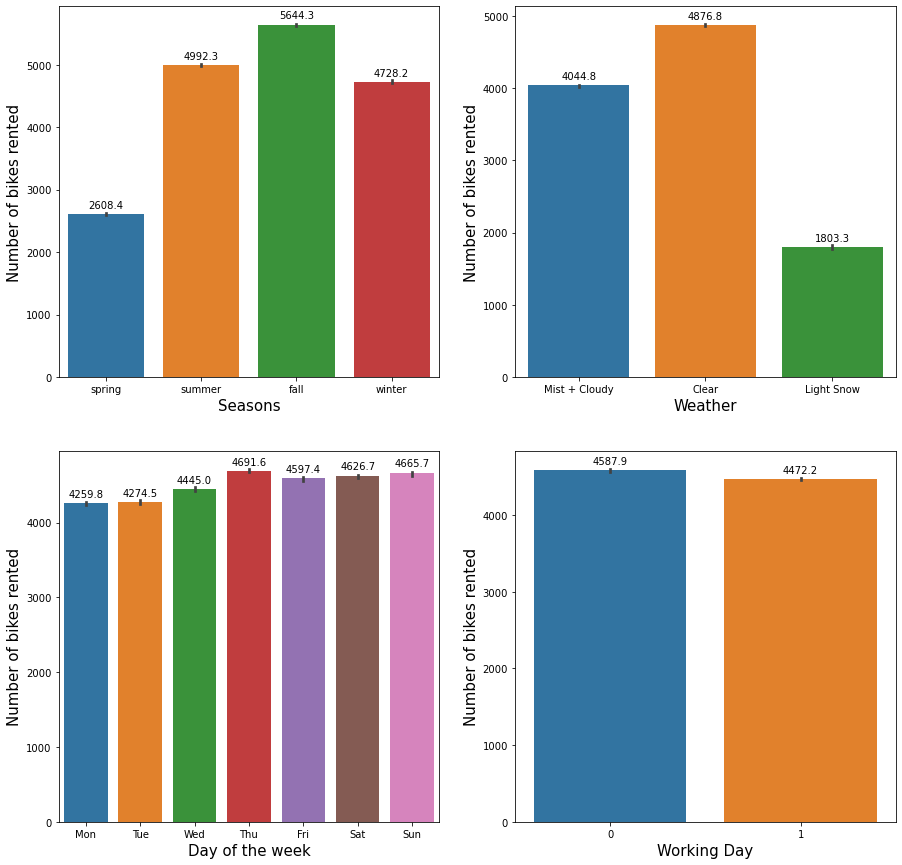

In [10]:
# plotting Bar Graph for Bivariate Analysis

plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
tplot = sns.barplot(bike['season'], bike['count'], ci = 10)
for p in tplot.patches:
    tplot.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
plt.xlabel('Seasons', fontsize = 15)
plt.ylabel('Number of bikes rented', fontsize = 15)
plt.subplot(2,2,2)
tplot1 = sns.barplot(bike['weathersit'],bike['count'], ci = 10)
for p in tplot1.patches:
    tplot1.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
plt.xlabel('Weather', fontsize = 15)
plt.ylabel('Number of bikes rented', fontsize = 15)
plt.subplot(2,2,3)
tplot2 = sns.barplot(bike['weekday'],bike['count'], ci = 10)
for p in tplot2.patches:
    tplot2.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
plt.xlabel('Day of the week', fontsize = 15)
plt.ylabel('Number of bikes rented', fontsize = 15)
plt.subplot(2,2,4)
tplot3 = sns.barplot(bike['workingday'],bike['count'], ci = 10)
for p in tplot3.patches:
    tplot3.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
plt.xlabel('Working Day', fontsize = 15)
plt.ylabel('Number of bikes rented', fontsize = 15)
plt.show()

#### Above graphs demonstrates that bike rentals are more during Fall and summer seasons where the weather is clear. When there is a light snow, bikes rented are very less. Also it seems that people use bike services more over the weekends and holidays.

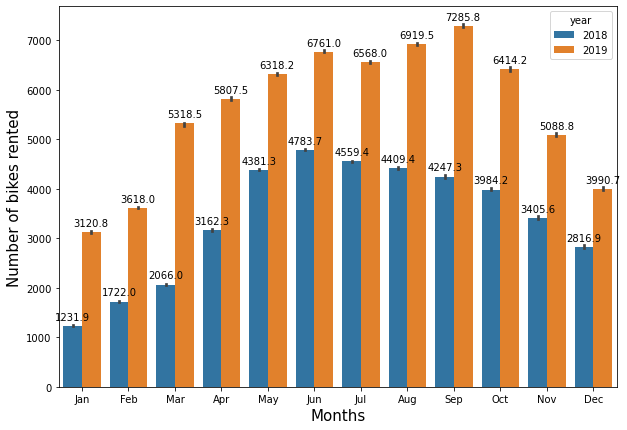

In [11]:
#plotting bar graph to analyse bike rental counts for different months over two years

plt.figure(figsize = (10,7))
splot = sns.barplot(x = 'month', y = 'count', hue = 'year', data = bike, ci = 10)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Number of bikes rented', fontsize = 15)
plt.show()

#### The graph shows that bike rentals are more in the months from May to October. There is a significant decrease in the rentals  from December to February. Also number of rentals has increased in 2019 as compared to 2018.

In [12]:
def scatter_plot(col1,col2,title):
    plt.figure(figsize = (18,7))
    sns.scatterplot(bike[col1],bike[col2])
    plt.xlabel(col1, fontsize = 15)
    plt.ylabel(col2,fontsize = 15)
    plt.title(title, fontdict = {'fontsize': 17})
    plt.show()

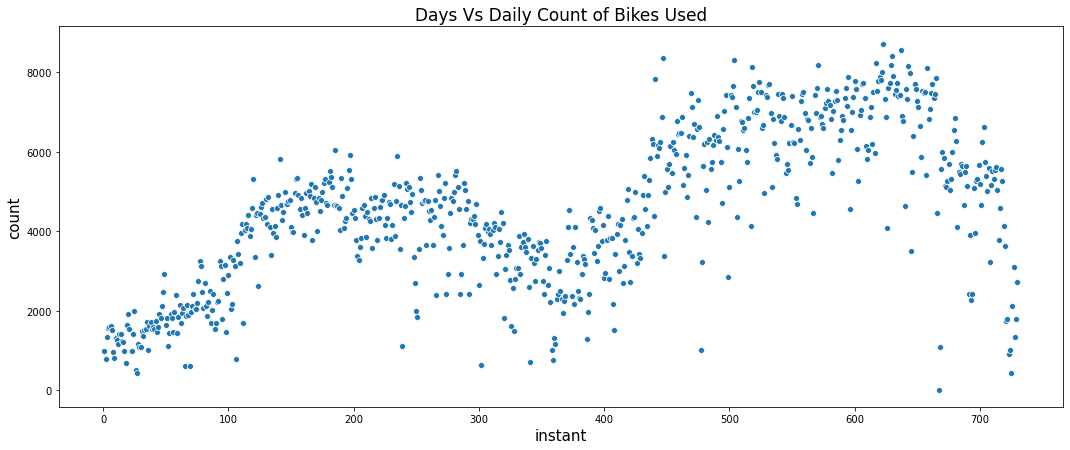

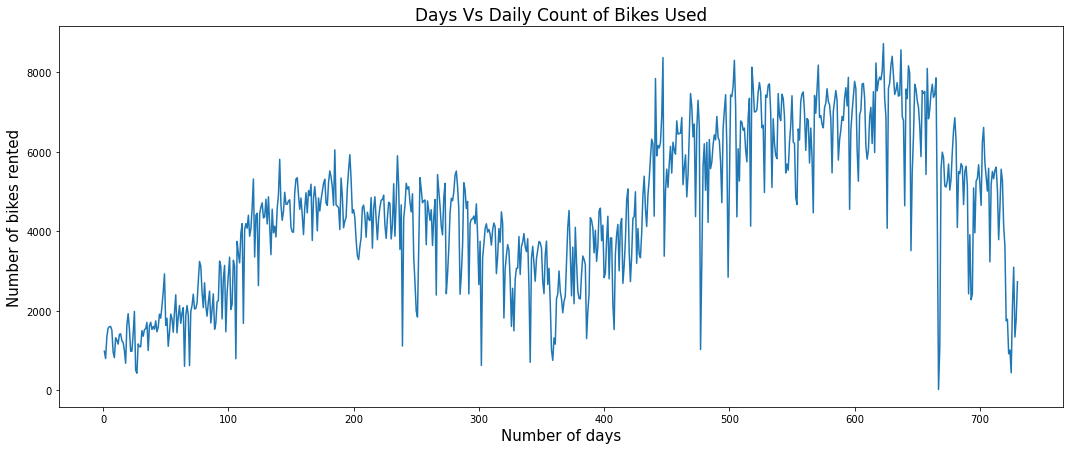

In [13]:
scatter_plot('instant','count','Days Vs Daily Count of Bikes Used')
plt.figure(figsize = (18,7))
plt.plot(bike['instant'],bike['count'])
plt.title('Days Vs Daily Count of Bikes Used', fontdict = {'fontsize': 17})
plt.xlabel('Number of days', fontsize = 15)
plt.ylabel('Number of bikes rented', fontsize = 15)
plt.show()

#### Above plots confirms that there has been a decrease in the number of people who have rented bikes in approximately last 80 days which further affected the revenue of the company.

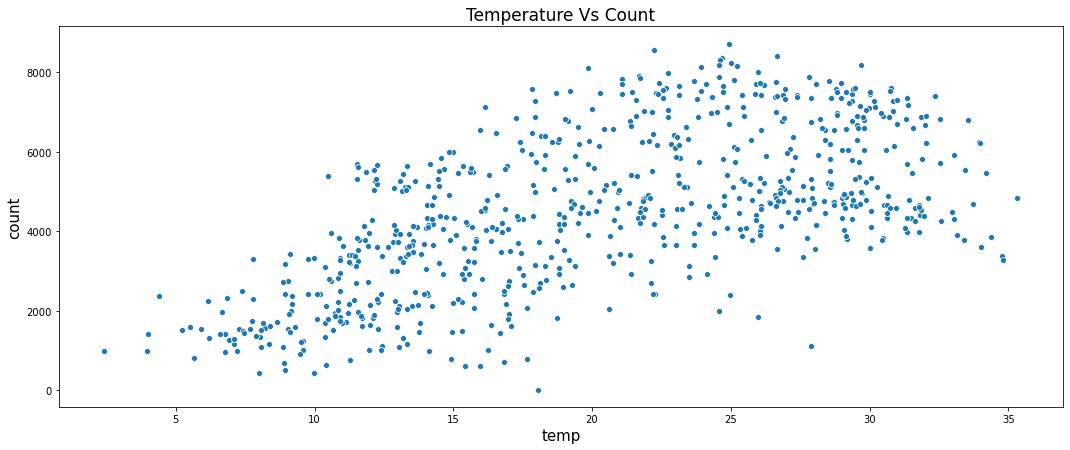

In [14]:
scatter_plot('temp','count','Temperature Vs Count')

#### For lower temperatures, number of bike rentals are less. Many poeple have rented bikes when temperature was moderate. Again we can see there is a slight decrease in  bike rentals where temperature was a bit high.

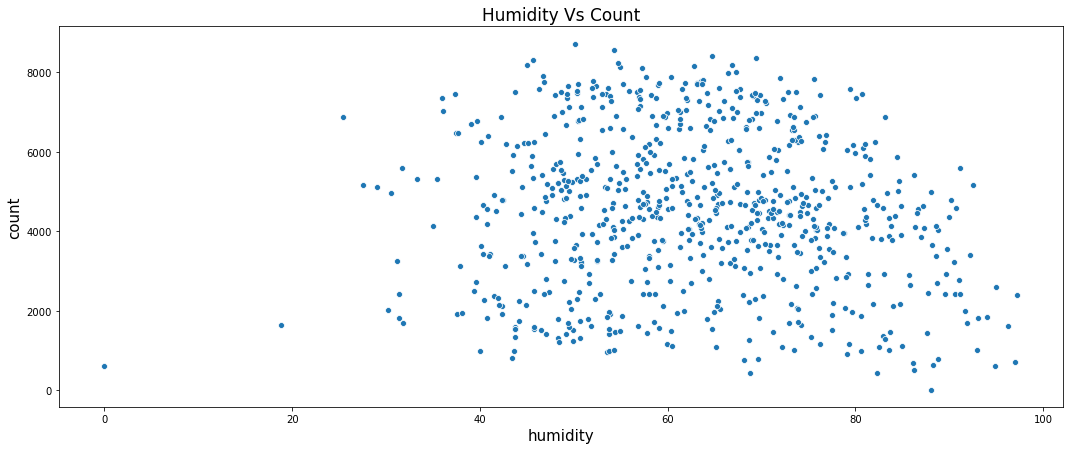

In [15]:
scatter_plot('humidity','count','Humidity Vs Count')

#### For low humidity, bike rental count is very low.

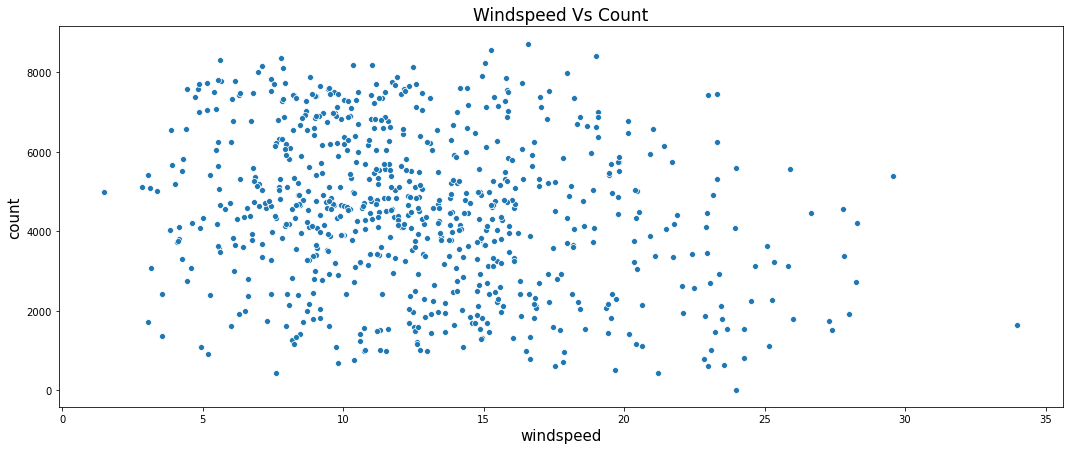

In [16]:
scatter_plot('windspeed','count','Windspeed Vs Count')

#### For higher windspeed, bike rentals are low

In [17]:
# Finding numeric and categorical columns

bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Visualising numeric data

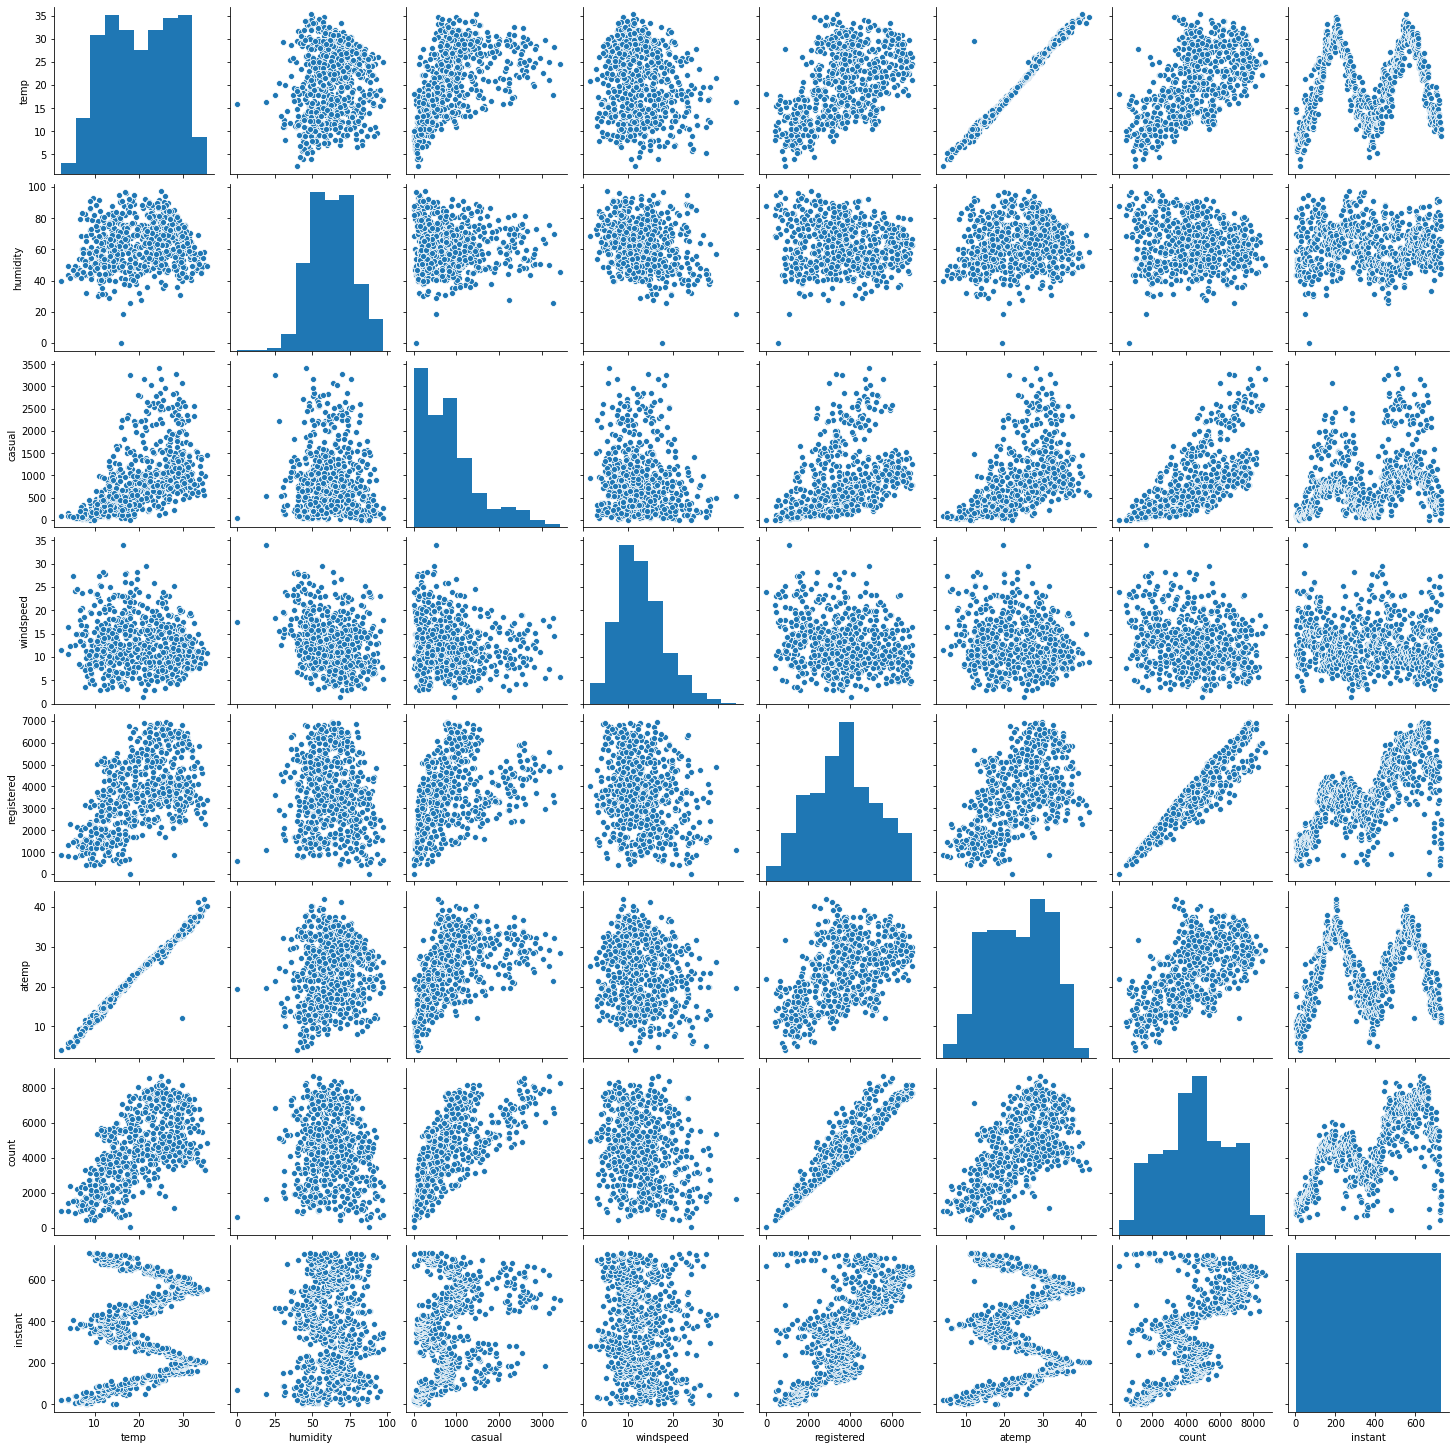

In [18]:
var = ["temp", "humidity",'casual','windspeed','registered','atemp','count','instant']
sns.pairplot(bike, vars = var)
plt.show()

In [19]:
#dropping unnecessary columns
bike=bike.drop(['instant', 'atemp','dteday','casual','registered'], axis = 1)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Multivariate Analysis

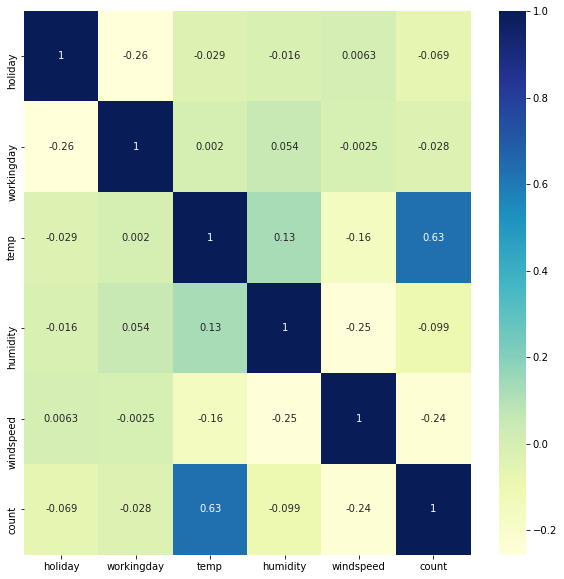

In [20]:
# heatmap

plt.figure(figsize = (10,10))
sns.heatmap(bike.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### Temperature and count of bike rentals are strongly correlated

### Creating Dummy variables

In [21]:
months = pd.get_dummies(bike.month, drop_first = True)
weekdays = pd.get_dummies(bike.weekday, drop_first = True)
weather_sits = pd.get_dummies(bike.weathersit, drop_first = True)
seasons = pd.get_dummies(bike.season, drop_first = True)
years = pd.get_dummies(bike.year, drop_first = True)

In [22]:
bike = pd.concat([months, weekdays, weather_sits, seasons, years, bike], axis = 1)

In [23]:
bike.drop(['season','month','weekday','weathersit', 'year'], axis = 1, inplace = True)

In [24]:
# verifying

bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,2019,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [25]:
bike.shape

(730, 29)

In [26]:
# sorting categorical and numeric data

bike.nunique().sort_values()

Aug                2
workingday         2
holiday            2
2019               2
winter             2
summer             2
spring             2
Mist + Cloudy      2
Light Snow         2
Wed                2
Tue                2
Sun                2
Thu                2
Mon                2
Sep                2
Oct                2
Nov                2
May                2
Mar                2
Jun                2
Jul                2
Jan                2
Feb                2
Dec                2
Sat                2
temp             498
humidity         594
windspeed        649
count            695
dtype: int64

### Preparing the data for modelling

In [27]:
# spliting dataset into train and test

df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

In [28]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_var = ['temp','humidity','windspeed','count']

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,2019,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [29]:
# dividing independent and dependant variables

y_train = df_train.pop('count')
X_train = df_train

In [30]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


### Using Recursive Feature Elimination to find most relevant columns

In [31]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

Rfe = RFE(lm, 15)             
Rfe = Rfe.fit(X_train, y_train)

In [32]:
#Columns where RFE support is True
col = X_train.columns[Rfe.support_]
col

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', '2019', 'holiday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [33]:
# Creating X_train dataframe with RFE selected variables
X_train_RFE = X_train[col]

In [34]:
#building model using all variables
X_train_sm = sm.add_constant(X_train_RFE)

# creating model
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          8.15e-189
Time:                        14:30:09   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
2019              0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
humidity         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
def get_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

In [36]:
vif = get_vif(X_train_RFE)
vif

,Features,VIF
13,humidity,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,2019,2.09
3,Nov,1.85
1,Jan,1.75


##### Dropping 'humidity' which has very high VIF and re-building the model

In [37]:
X_train_RFE = X_train_RFE.drop(labels = 'humidity', axis = 1)

In [38]:
# re-building model using all variables
X_train_sm = sm.add_constant(X_train_RFE)

# creating model
lr2 = sm.OLS(y_train, X_train_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          4.75e-186
Time:                        14:30:11   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618      0.000       0.182       0.308
Dec              -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan              -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov              -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep               0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring           -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer            0.0349      0.015      2.251      0.025       0.004       0.065
winter            0.0869      0.018      4.831      0.000       0.052       0.122
2019              0.2345      0.008     28.687      0.000       0.218       0.251
holiday          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = get_vif(X_train_RFE)
vif

,Features,VIF
12,temp,5.17
13,windspeed,4.67
9,winter,2.95
7,spring,2.89
8,summer,2.24
10,2019,2.07
3,Nov,1.81
1,Jan,1.66
2,Jul,1.59
6,Mist + Cloudy,1.57


##### Dropping 'Nov' which has high p-value and low VIF and re-building the model

In [40]:
X_train_RFE = X_train_RFE.drop(labels = 'Nov', axis = 1)

In [41]:
# re-building model using all variables
X_train_sm = sm.add_constant(X_train_RFE)

# creating model
lr3 = sm.OLS(y_train, X_train_sm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          2.74e-186
Time:                        14:30:13   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2283      0.031      7.310      0.000       0.167       0.290
Dec              -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan              -0.0451      0.018     -2.467      0.014      -0.081      -0.009
Jul              -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sep               0.0742      0.017      4.373      0.000       0.041       0.108
Light Snow       -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Mist + Cloudy    -0.0793      0.009     -9.089      0.000      -0.096      -0.062
spring           -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer            0.0404      0.015      2.635      0.009       0.010       0.070
winter            0.0774      0.017      4.438      0.000       0.043       0.112
2019              0.2343      0.008     28.573      0.000       0.218       0.250
holiday          -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp              0.4581      0.035     13.031      0.000       0.389       0.527
windspeed        -0.1594      0.025     -6.291      0.000      -0.209      -0.110
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = get_vif(X_train_RFE)
vif

,Features,VIF
11,temp,5.14
12,windspeed,4.62
6,spring,2.89
7,summer,2.24
9,2019,2.07
8,winter,2.05
1,Jan,1.65
2,Jul,1.59
5,Mist + Cloudy,1.57
3,Sep,1.34


##### Dropping 'Dec' which has high p-value and low VIF and re-building the model

In [43]:
X_train_RFE = X_train_RFE.drop(labels = 'Dec', axis = 1)

In [44]:
#building model using all variables
X_train_sm = sm.add_constant(X_train_RFE)

# creating model
lr4 = sm.OLS(y_train, X_train_sm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          8.14e-187
Time:                        14:30:14   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088      0.000       0.156       0.275
Jan              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
Jul              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep               0.0764      0.017      4.506      0.000       0.043       0.110
Light Snow       -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring           -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer            0.0434      0.015      2.845      0.005       0.013       0.073
winter            0.0757      0.017      4.335      0.000       0.041       0.110
2019              0.2343      0.008     28.517      0.000       0.218       0.250
holiday          -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp              0.4721      0.034     13.772      0.000       0.405       0.539
windspeed        -0.1549      0.025     -6.135      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = get_vif(X_train_RFE)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
5,spring,2.75
6,summer,2.24
8,2019,2.07
7,winter,1.78
0,Jan,1.61
1,Jul,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


##### Dropping 'Jan' which has high p-value and low VIF and re-building the model

In [46]:
X_train_RFE = X_train_RFE.drop(labels = 'Jan', axis = 1)

In [47]:
#building model using all variables
X_train_sm = sm.add_constant(X_train_RFE)

# creating model
lr5 = sm.OLS(y_train, X_train_sm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          5.06e-187
Time:                        14:30:16   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
Jul              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
2019              0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp              0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = get_vif(X_train_RFE)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
5,summer,2.23
4,spring,2.08
7,2019,2.07
6,winter,1.78
0,Jul,1.58
3,Mist + Cloudy,1.55
1,Sep,1.34
2,Light Snow,1.08


##### Trying to drop 'temp' column and view its effect on R-squared value

In [49]:
X_train_RFE1 = X_train_RFE.drop(labels = 'temp', axis = 1)

In [50]:
#building model using all variables
X_train_sm1 = sm.add_constant(X_train_RFE1)

# creating model
lr6 = sm.OLS(y_train, X_train_sm1).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          5.02e-149
Time:                        14:30:17   Log-Likelihood:                 406.16
No. Observations:                 510   AIC:                            -790.3
Df Residuals:                     499   BIC:                            -743.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5837      0.017     34.708      0.000       0.551       0.617
Jul              -0.0127      0.022     -0.573      0.567      -0.056       0.031
Sep               0.0727      0.020      3.568      0.000       0.033       0.113
Light Snow       -0.2959      0.030     -9.988      0.000      -0.354      -0.238
Mist + Cloudy    -0.0895      0.010     -8.541      0.000      -0.110      -0.069
spring           -0.3005      0.017    -17.823      0.000      -0.334      -0.267
summer           -0.0449      0.017     -2.693      0.007      -0.078      -0.012
winter           -0.0793      0.016     -4.941      0.000      -0.111      -0.048
2019              0.2472      0.010     25.204      0.000       0.228       0.266
holiday          -0.1005      0.031     -3.215      0.001      -0.162      -0.039
windspeed        -0.1705      0.030     -5.676      0.000      -0.230      -0.112
==============================================================================
Omnibus:                       26.128   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.105
Skew:                          -0.293   Prob(JB):                     2.94e-12
Kurtosis:                       4.468   Cond. No.                         9.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = get_vif(X_train_RFE1)
vif

,Features,VIF
9,windspeed,3.81
4,spring,2.07
5,summer,2.01
7,2019,1.83
6,winter,1.73
3,Mist + Cloudy,1.52
0,Jul,1.19
1,Sep,1.16
2,Light Snow,1.08
8,holiday,1.04


#### There is a huge drop on R-square and adjusted R-squared after dropping 'temp' column. So this model won't be good. 


#### Hence pervious model 'lr5' which is obtained by removing humidity, Nov, Dec and Jan variables from the RFE support columns is our final model which will be used for making predictions

### Predictions on train dataset 

In [121]:
y_train_pred = lr5.predict(X_train_sm)

Text(0, 0.5, 'y__train_pred')

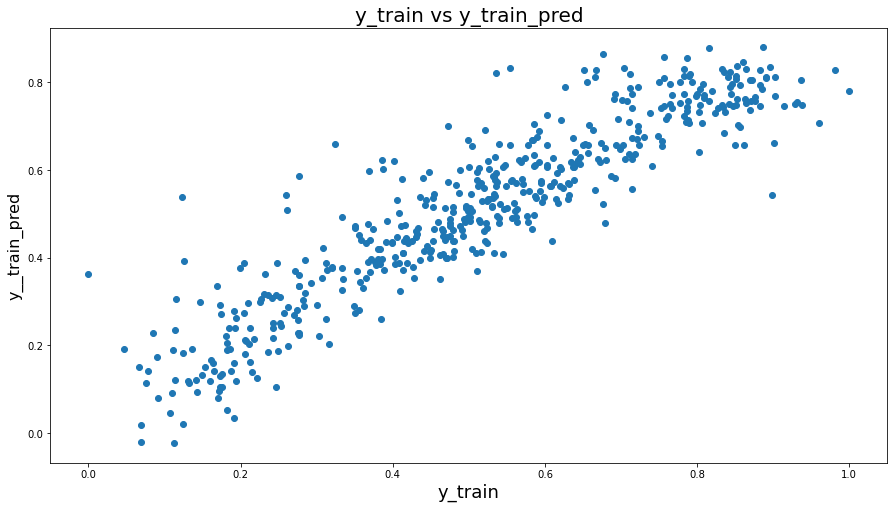

In [122]:
# Plotting y_train and y_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_train, y_train_pred)
plt.title('y_train vs y_train_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                         
plt.ylabel('y__train_pred', fontsize = 16) 

#### As we can see, the spread in above plot is linear.

## Residual Analysis

In [123]:
res = y_train - y_train_pred

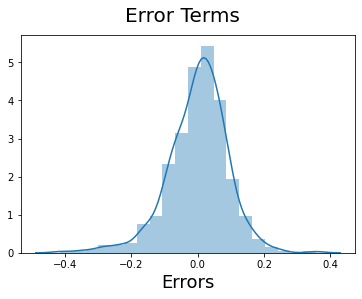

In [128]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                        
plt.show()

#### Above distribution shows that the Error terms are normally distributed which satisfies assumptions of regression. So we can say that our 'lr5' is a good model.

## Making predictions using Final Model

In [129]:
# Scaling on test data

num_v = ['temp','humidity','windspeed','count']
df_test[num_v] = scaler.transform(df_test[num_v])
df_test.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,2019,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [130]:
# preparing y and X data for test

y_test = df_test.pop('count')
X_test = df_test

In [131]:
# adding constant

X_test_sm = sm.add_constant(X_test[['Jul','Sep','Light Snow','Mist + Cloudy','spring','summer','winter','2019','holiday','temp','windspeed']])

In [132]:
X_test_sm.head()

,const,Jul,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,2019,holiday,temp,windspeed
184,1.0,1,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [133]:
# predicting

y_test_pred = lr5.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

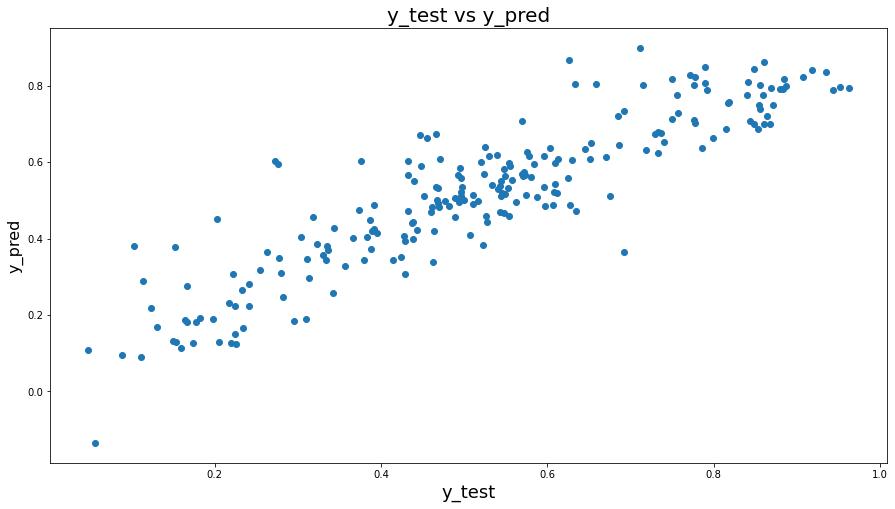

In [134]:
# Plotting y_test and y_test_pred to understand the spread

plt.figure(figsize=(15,8))
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

#### The spread for test dataset is similar to that of train dataset.

In [99]:
#R-squared value for test dataset

r2_test = r2_score(y_test,y_test_pred)
r2_test

0.8052680349048551

In [105]:
# Adjusted R-squared value for test dataset
Adj_r2 = 1-(1-r2_test)*(12-1)/(12-1-1)
Adj_r2

0.7857948383953406

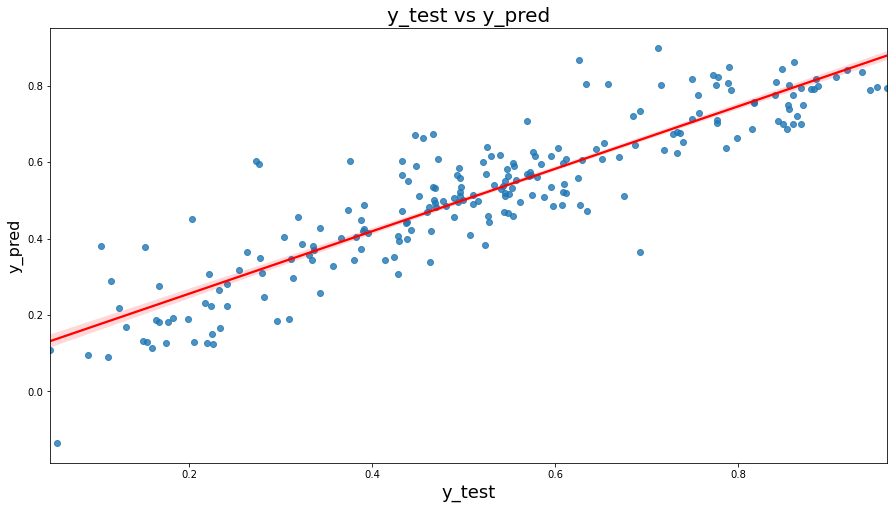

In [108]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x = y_test, y = y_test_pred, ci = 68, fit_reg = True, line_kws = {"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### We can see best fitted line in above plot

### OLS Regression for Final model:

In [135]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          5.06e-187
Time:                        14:07:09   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1994      0.030      6.746      0.000       0.141       0.258
Jul              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep               0.0768      0.017      4.517      0.000       0.043       0.110
Light Snow       -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy    -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring           -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer            0.0465      0.015      3.051      0.002       0.017       0.076
winter            0.0817      0.017      4.730      0.000       0.048       0.116
2019              0.2336      0.008     28.352      0.000       0.217       0.250
holiday          -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp              0.4910      0.033     14.770      0.000       0.426       0.556
windspeed        -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The equation of best fitted line can be derived from co-efficients of final model

count = 0.4910*'temp' -0.0521*'Jul' + 0.0768*'Sep' - 0.2842*'Light Snow' - 0.0802*'Mist + Cloudy' - 0.0672*'spring' + 0.0465*'summer' + 0.0817*'winter' + 0.2336*'2019' - 0.0975*'holiday' - 0.1479*'windspeed'

### Comparison between Train and Test model:
- Train R^2 : 0.835
- Train Adjusted R^2 : 0.832
- Test R^2: 0.805
- Test Adjusted R^2: 0.79
- Difference in R^2 between train and test: 3%
- Difference in adjusted R^2 between Train and test: 4.2% which is less than 5%

#### From above comparison we can conclude that we have created a good model as difference between train and test R-squared and adjusted R-squared is less that 5%

### Conclusions: 

- Temperature variable is having the highest coefficient 0.4914, that means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units. Similary we can see coefficients of other variables in the equation for best fitted line.
- There are some variables with negative coefficients which suggests that as the independent variable increases, the dependent variable decreases. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

### Solutions:
- BoomBikes can focus more on Temperature changes in order to increase their sales
- Company can gain maximum profits if they focus on Summer & Winter season, September month, Weekends & Working days as they have good and positive effects on bike rentals.
- Some discounts or promotional offers can be offered in order to attract the customers in the spring season which has negative coefficient implying that rentals are less in this season.